# Regresión lineal con descenso del gradiente y selección de características

[descripcion]

## 1. Exploración y limpieza del dataset

### 1.1. Carga del Dataset y configuracion del entorno

In [12]:
# Install dependencies as needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the data
data = pd.read_csv('data.csv')

# Print the first few rows of the data
print(data.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


### 1.2. Analisis del Dataset

In [14]:
# Análisis exploratorio de datos (EDA)

data.info()

data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


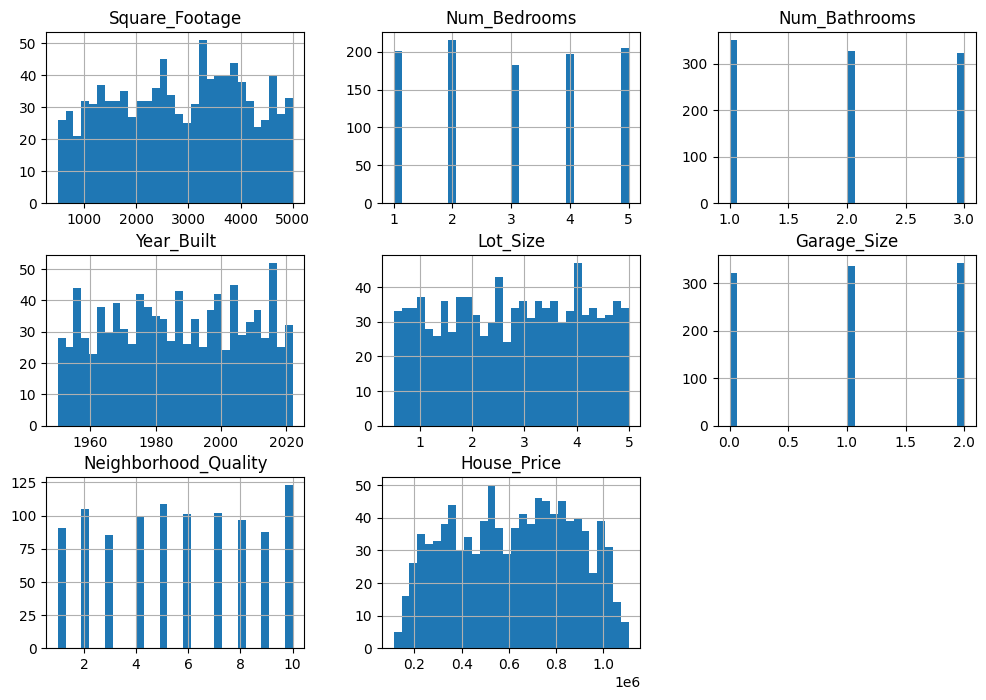

In [15]:
data.hist(figsize=(12, 8), bins=30)
plt.show()

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

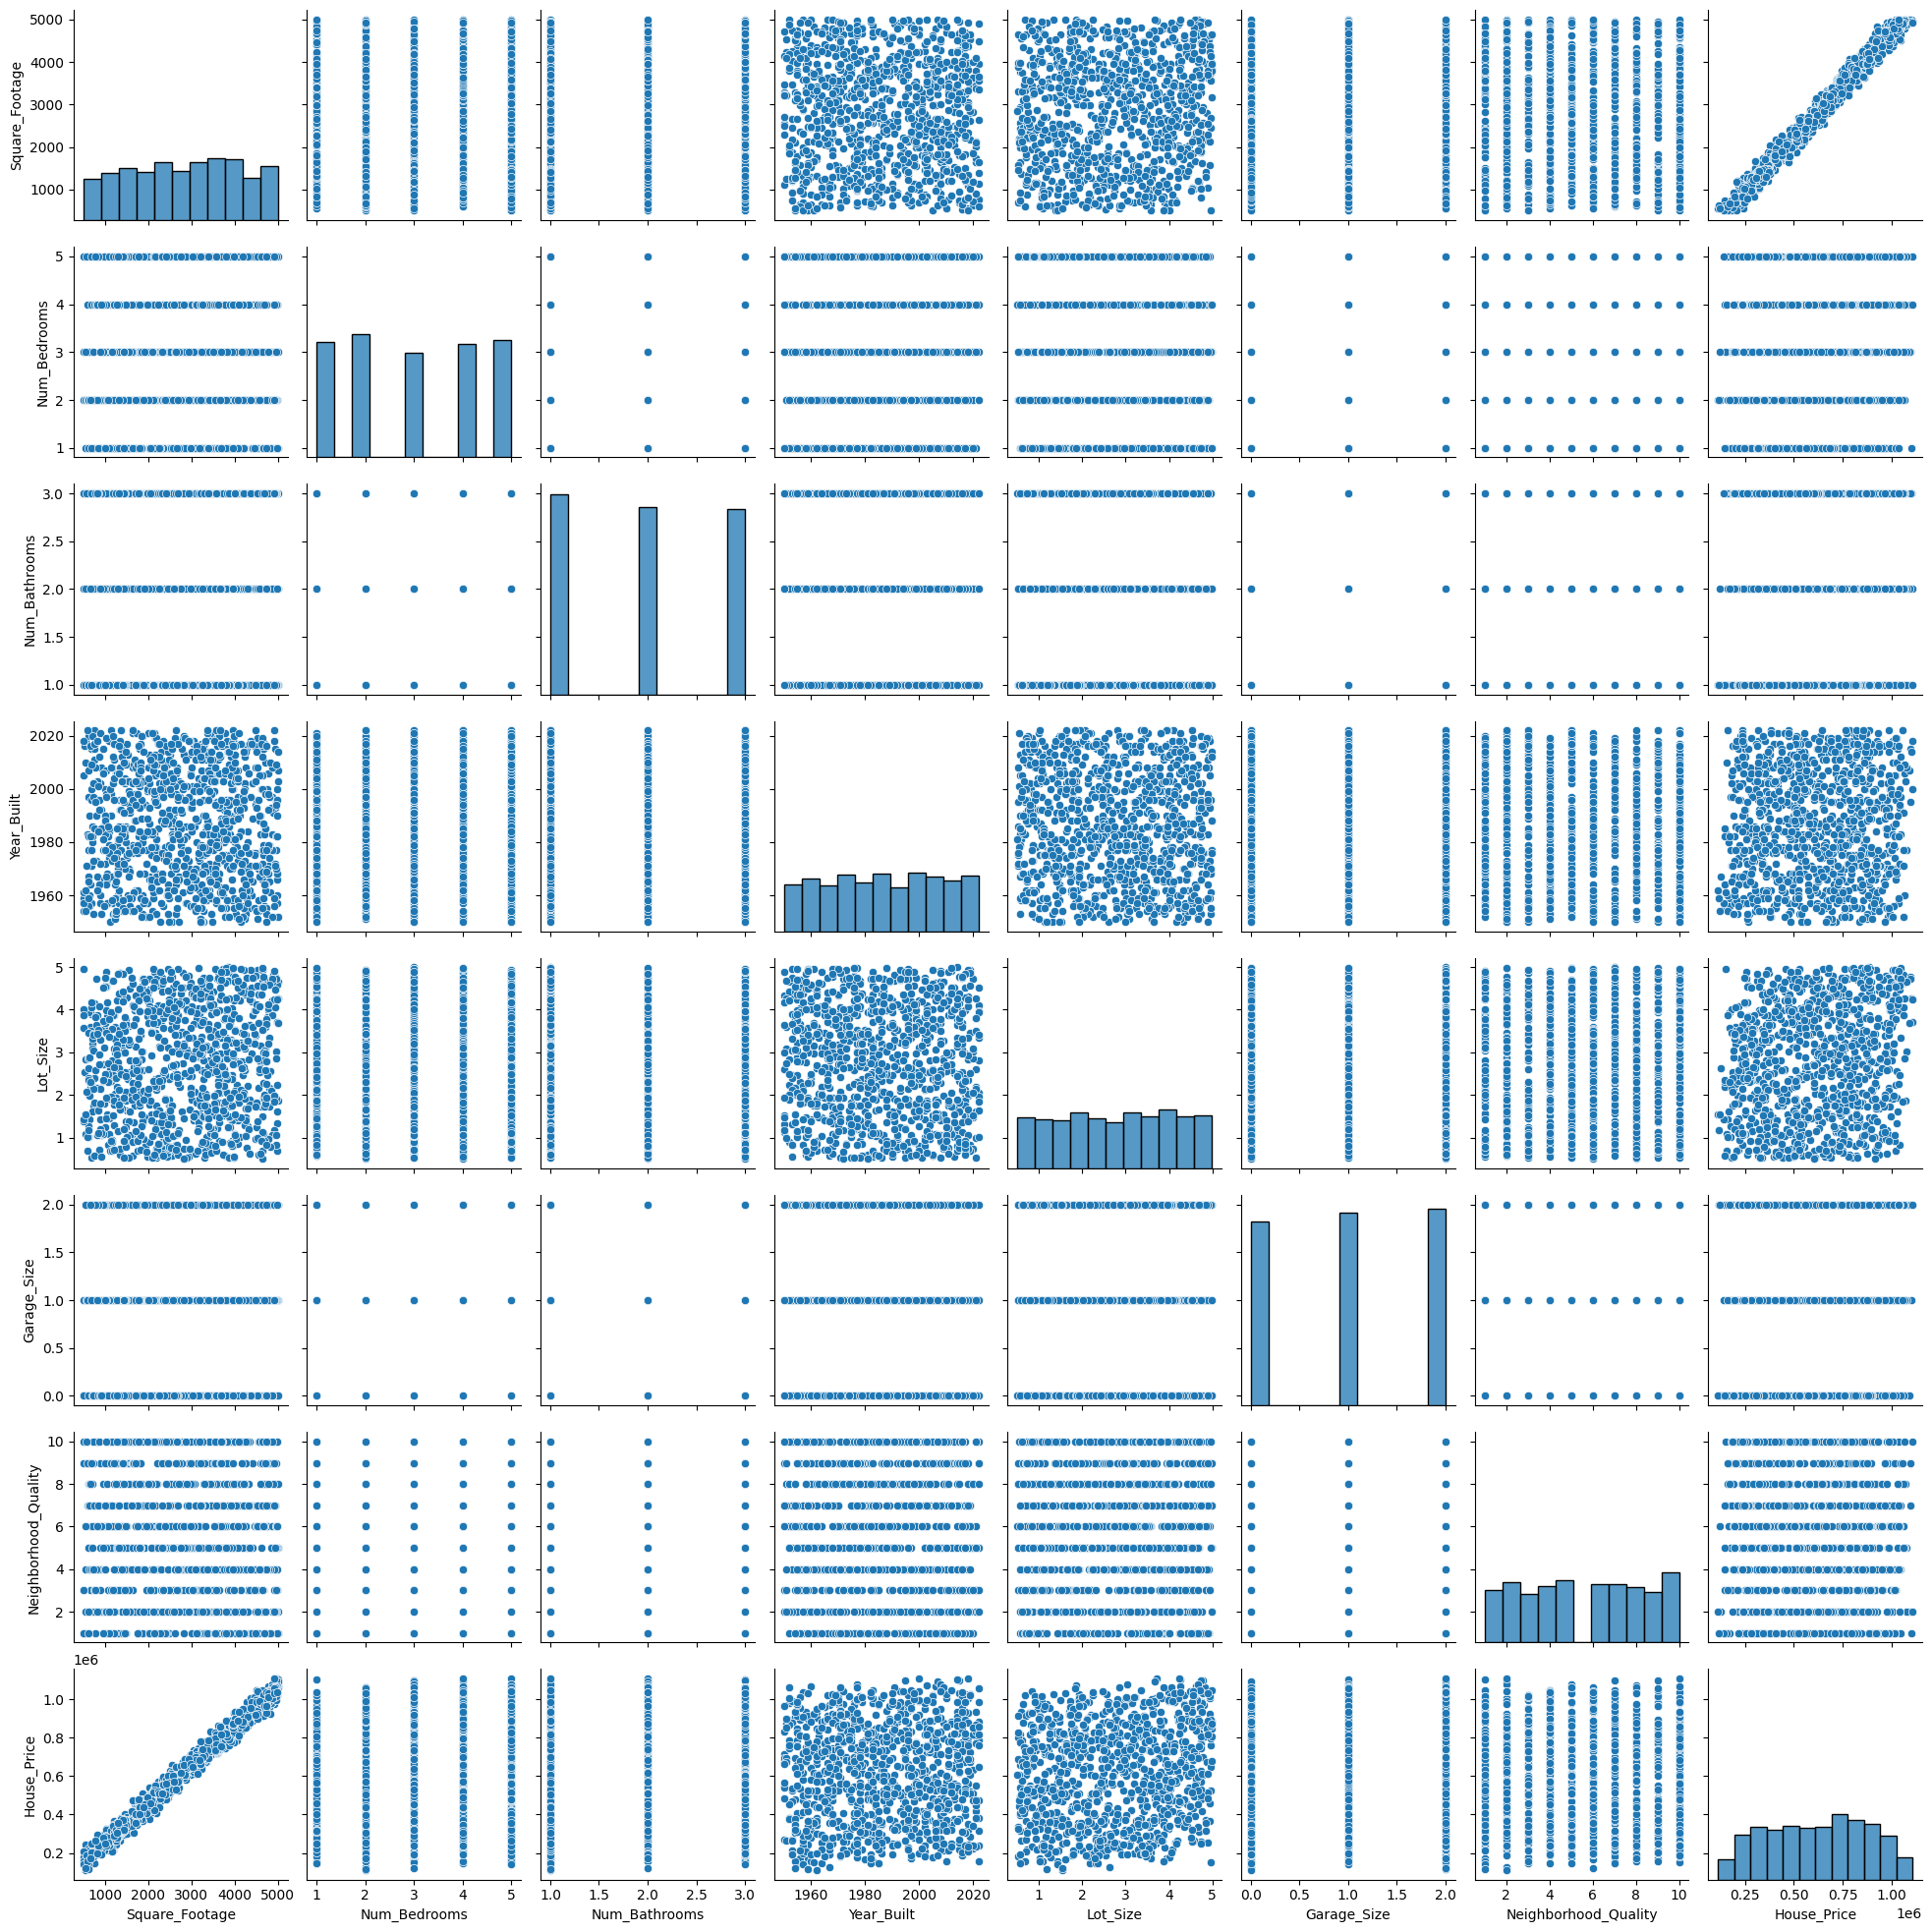

In [16]:
sns.pairplot(data,palette='RdBu')

In [17]:
# Definir función para detectar valores atípicos con IQR
def detectar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers


# Aplicar la función al dataset
outliers = detectar_outliers_iqr(data.select_dtypes(include=[np.number]))
print(outliers.sum())  # Cantidad de valores atípicos por variable

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


## 2. Selección de características

### 2.1. Manejo de Features Ordinales

Neighborhood_Quality es una variable ordinal, ya que tiene un orden lógico (de 1 a 10), donde 10 representa una mejor calidad del vecindario que 1, pero la diferencia entre niveles no es necesariamente uniforme (es decir, la diferencia entre 8 y 9 puede no ser la misma que entre 2 y 3).

In [18]:
data_encoded = pd.get_dummies(data, columns=['Neighborhood_Quality'], prefix='NQ')

### 2.2. Análisis de Correlación para Features Numéricos

In [19]:
correlation_matrix = data.corr(method="spearman")  # o method="spearman"
print(correlation_matrix)

                      Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  \
Square_Footage              1.000000     -0.043303      -0.031387   -0.022243   
Num_Bedrooms               -0.043303      1.000000       0.023319   -0.015463   
Num_Bathrooms              -0.031387      0.023319       1.000000   -0.021139   
Year_Built                 -0.022243     -0.015463      -0.021139    1.000000   
Lot_Size                    0.089778     -0.009396       0.034918   -0.060656   
Garage_Size                 0.029925      0.113815       0.024570   -0.025677   
Neighborhood_Quality       -0.007949     -0.049141       0.017639   -0.009803   
House_Price                 0.991602      0.013095      -0.002720    0.047417   

                      Lot_Size  Garage_Size  Neighborhood_Quality  House_Price  
Square_Footage        0.089778     0.029925             -0.007949     0.991602  
Num_Bedrooms         -0.009396     0.113815             -0.049141     0.013095  
Num_Bathrooms         0.034

Tras identificar variables altamente correlacionadas (con un coeficiente mayor a 0.8 o menor a -0.8) podemos deducir:
- El único par de variables altamente correlacionadas es Square_Footage con House_Price
- Ninguna otra variable tiene una correlación extrema con otra.
- Garage_Size y Year_Built tienen correlaciones bajas con House_Price (~0.05), lo que sugiere que no afectan mucho el precio.
- Num_Bathrooms tiene correlacion aun mas bajas con House_Price (~0.01), no tiene un impacto significativo en el precio de la casa

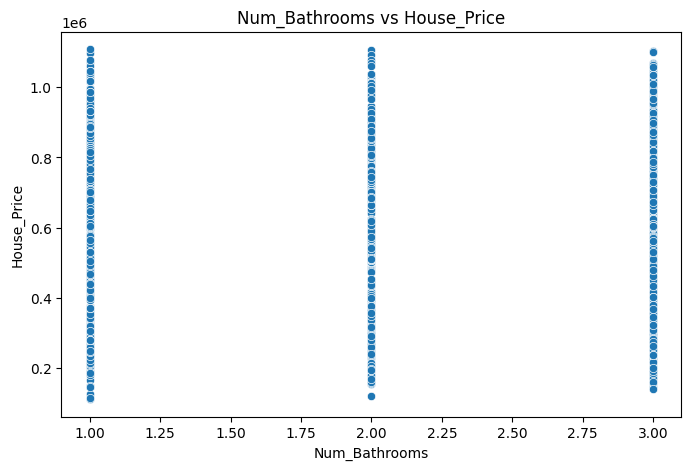

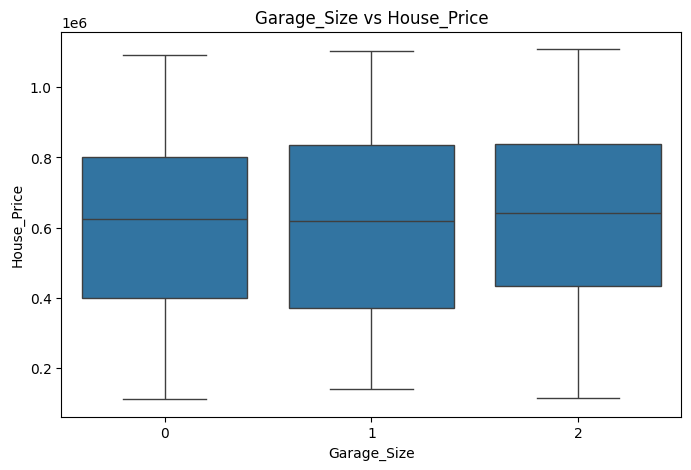

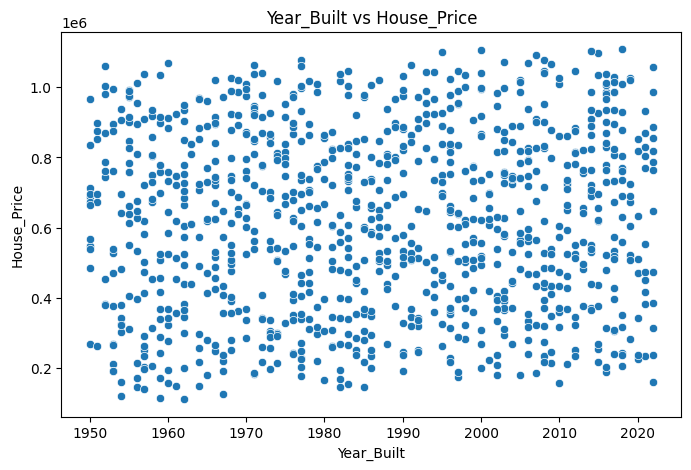

In [20]:
# Scatter plot Num_Bathrooms vs House_Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Num_Bathrooms'], y=data['House_Price'])
plt.title("Num_Bathrooms vs House_Price")
plt.show()

# Boxplot Garage_Size vs House_Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Garage_Size'], y=data['House_Price'])
plt.title("Garage_Size vs House_Price")
plt.show()

# Scatter plot Year_Built vs House_Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Year_Built'], y=data['House_Price'])
plt.title("Year_Built vs House_Price")
plt.show()

Dado que los resultados de los graficos demuestran que no hay una relacion lineal con esos features, se procede a eliminarlos del dataset para el entrenamiento del modelo

In [11]:
# Eliminar columnas con poca correlación
#data = data.drop(columns=['Num_Bedrooms','Num_Bathrooms','Year_Built','Lot_Size','Garage_Size','Neighborhood_Quality'])

### 2.3. Aplicar Transformaciones a los Datos

## 3. Implementación de regresión lineal con descenso del gradiente

In [2]:
def derivada_L_w(x, y_pred, y):
    '''
    x (array-like): Vector de características.
    y_pred (scalar): Predicción de la regresión lineal.
    y (scalar): Valor real.
    '''
    return 2 * np.mean((y_pred - y) * x, axis=0)

def derivada_L_b(x, y_pred, y):
    '''
    Calcula el resultado de la derivada de L respecto b
    2/n * sum(y_pred - y)
    '''
    return 2 * np.mean(y_pred - y)

def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''
    # Producto punto entre x y w
    return np.dot(x, w) + b


def MSE(y_pred, y):
    return np.mean((y_pred - y) ** 2)



In [244]:
data.head()

,Square_Footage,House_Price
0,-1.159803,-1.406552
1,1.160724,1.445699
2,0.618843,0.627824
3,-1.473776,-1.535512
4,1.681887,1.668552


In [21]:
# Divida el dataset en train/validation/test (70%-15%-15%)
from sklearn.model_selection import train_test_split

# normalizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)

X = data.drop(columns=['House_Price'])
y = data['House_Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(700, 7) (150, 7) (150, 7)


In [22]:
# crear una lista de pesos iniciales aleatorios
np.random.seed(0)
w = np.random.randn(data.shape[1]-1) * np.sqrt(1 / (data.shape[1]-1))
b = np.random.default_rng().random()

epochs = 400
plotEvery = epochs//50
alfa = 0.01



errorBySample = []
derivadas_w = []
derivadas_b = []

for epoch in range(epochs):
    samples = zip(X_train.values, y_train)  
    for (x, y) in samples:
        y_pred = modelo(x, w, b)
        error = MSE(y_pred, y)
        errorBySample.append(error)

        derivadaW = derivada_L_w(x, y_pred, y)
        derivadas_w.append(derivadaW)

        derivadaB = derivada_L_b(x, y_pred, y)
        derivadas_b.append(derivadaB)

        # print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

    
    promedio_derivada_w = np.mean(derivadas_w)
    w = w - alfa * promedio_derivada_w

    promedio_derivada_b = np.mean(derivadas_b)
    b = b - alfa * promedio_derivada_b

    costError = np.mean(errorBySample)

    if (epoch % plotEvery) == 0:
        print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {costError:.5F}, nuevo valor de W = {w}, B = {b:.5F}")
      
    
    #Reiniciamos
    errorBySample = []
    derivadas_w = []
    derivadas_b = []


NameError: name 'modelo' is not defined

In [245]:
print(f"Valor de W = {w}, B = {b:.5F}")

Valor de W = [0.9937509], B = 0.00046


In [246]:
# Validación del modelo
y_pred = modelo(X_val.values, w, b)
error = MSE(y_pred, y_val)
print(f"Error en el conjunto de validación = {error:.5F}")

Error en el conjunto de validación = 0.01668


## 4. Análisis de sesgo y varianza

MSE Train: 0.005450694518659704
MSE Validation: 0.0059144511434620056
MSE Test: 0.005188056568384325
R2 Train: 0.9945632495140688
R2 Validation: 0.9932470225649763
R2 Test: 0.9953346426431885


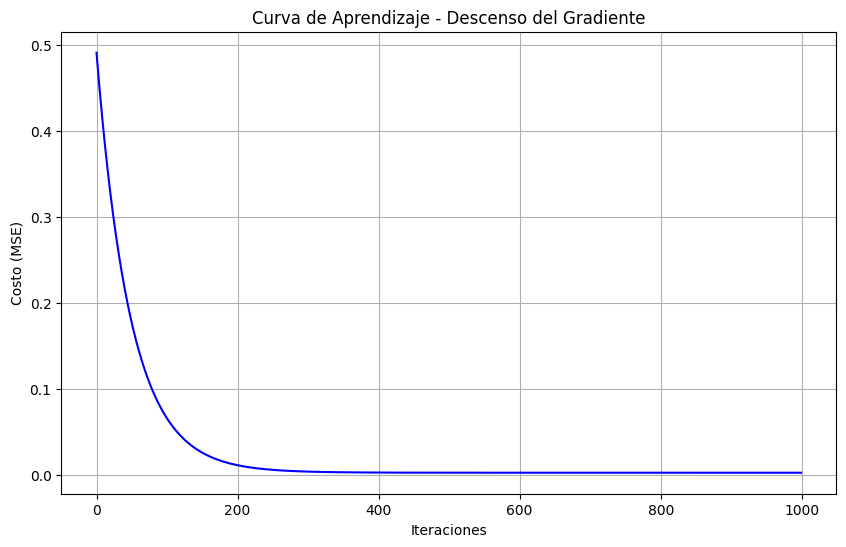

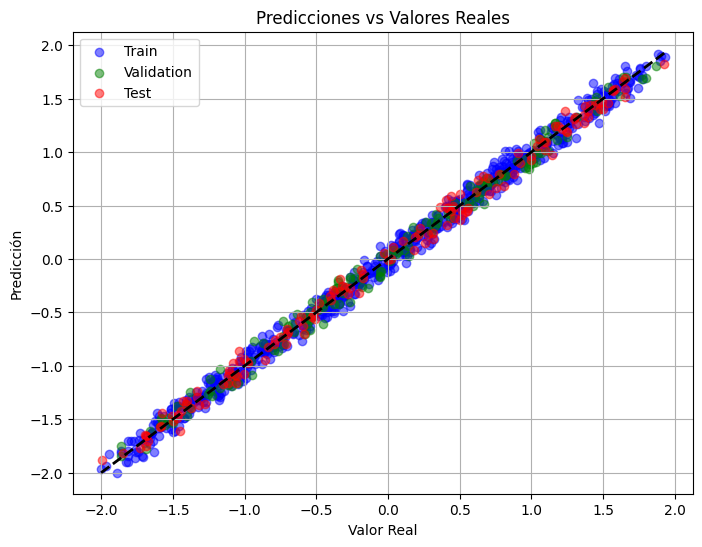

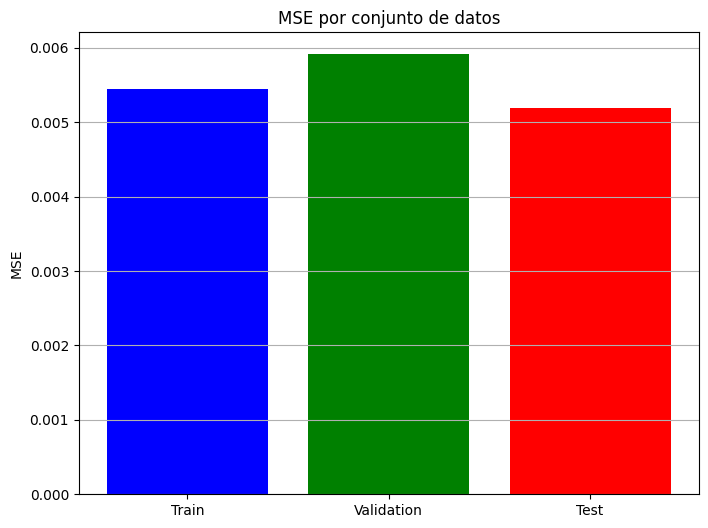

In [23]:

# -------------------------------------------
# SECCIÓN 3: Implementación del Algoritmo de Regresión Lineal con Descenso del Gradiente

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Separar features y target
X = data[['Square_Footage', 'Lot_Size', 'Garage_Size', 'Year_Built']]
y = data['House_Price']

# 2. Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División en train, validation y test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Inicialización de parámetros
m, n = X_train.shape
theta = np.zeros(n)
alpha = 0.01
iterations = 1000

# 5. Funciones
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X @ theta
        theta -= (alpha/m) * (X.T @ (predictions - y))
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# 6. Entrenamiento del modelo
theta_final, cost_history = gradient_descent(X_train, y_train.values, theta, alpha, iterations)

# 7. Predicciones
y_pred_train = X_train @ theta_final
y_pred_val = X_val @ theta_final
y_pred_test = X_test @ theta_final

# 8. Evaluaciones
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)
r2_test = r2_score(y_test, y_pred_test)

print("MSE Train:", mse_train)
print("MSE Validation:", mse_val)
print("MSE Test:", mse_test)

print("R2 Train:", r2_train)
print("R2 Validation:", r2_val)
print("R2 Test:", r2_test)

# 9. Curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Curva de Aprendizaje - Descenso del Gradiente')
plt.grid()
plt.show()

# 10. Gráfico de predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_train, color='blue', label='Train', alpha=0.5)
plt.scatter(y_val, y_pred_val, color='green', label='Validation', alpha=0.5)
plt.scatter(y_test, y_pred_test, color='red', label='Test', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid()
plt.show()

# 11. MSE comparativo en bar chart
errors = [mse_train, mse_val, mse_test]
labels = ['Train', 'Validation', 'Test']

plt.figure(figsize=(8,6))
plt.bar(labels, errors, color=['blue', 'green', 'red'])
plt.title('MSE por conjunto de datos')
plt.ylabel('MSE')
plt.grid(axis='y')
plt.show()
